<a href="https://colab.research.google.com/github/PrashantShrivastava1612/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Capstone Project/Bike Sharing Demand Prediction/SeoulBikeData.csv'
data = pd. read_csv(path, encoding = "ISO-8859-1")

In [42]:
# Dataset First Look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [43]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [44]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

In [45]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [46]:
#null values in dataset
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [47]:
#duplicate values count
data.duplicated().sum()

0

Our dataset contains 8760 rows and 14 columns.

No null value is present in the datset.

No duplicate observations were present in the dataset.

## ***Understanding Variables***

In [48]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [49]:
# Dataset Describe
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


###***Variable Description***



Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## ***Data Wrangling***

In [50]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

## ***Data Exploration and Visualisation***

###***Univariate Analysis***

<Axes: >

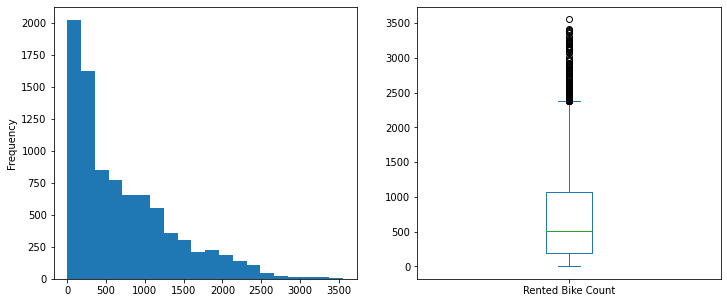

In [51]:
#distribution of target variable
fig = plt.figure(figsize=(25, 5))

df1 = data['Rented Bike Count']

ax1 = fig.add_subplot(141)
df1.plot.hist(ax=ax1, bins=20)

df2 = data['Rented Bike Count']

ax2 = fig.add_subplot(142)
df2.plot.box(ax=ax2)

In [52]:
numerical_features = [ ('Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)'),('Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)')]


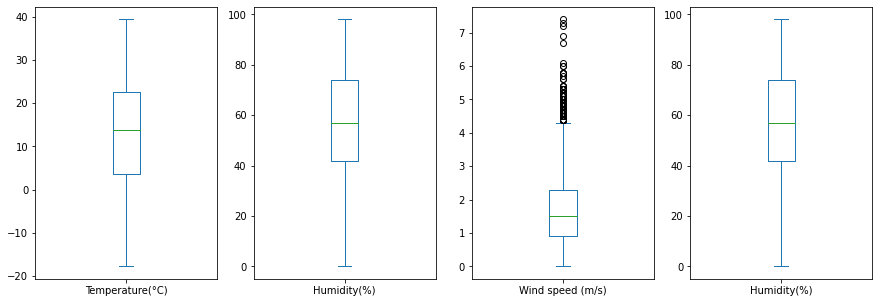

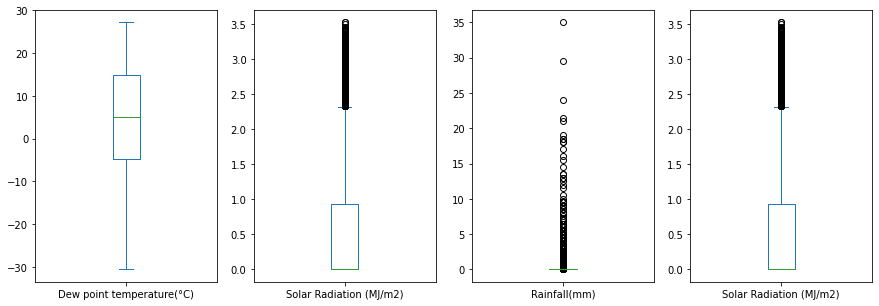

In [53]:

for i,j,k,l in numerical_features:
  fig = plt.figure(figsize=(15, 5))

  df1 = data[i]

  ax1 = fig.add_subplot(141)
  df1.plot.box(ax=ax1)

  df2 = data[j]

  ax2 = fig.add_subplot(142)
  df2.plot.box(ax=ax2)

  df3 = data[k]

  ax3 = fig.add_subplot(143)
  df3.plot.box(ax=ax3)

  df4 = data[l]

  ax4 = fig.add_subplot(144)
  df2.plot.box(ax=ax4)

  plt.show()


In [75]:
numerical_features = list(data.describe().columns)
numerical_features.remove('Rented Bike Count')
numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

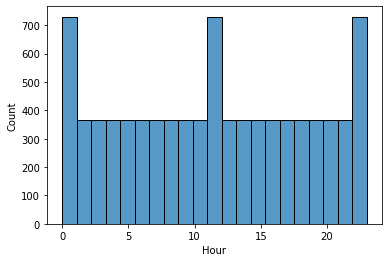

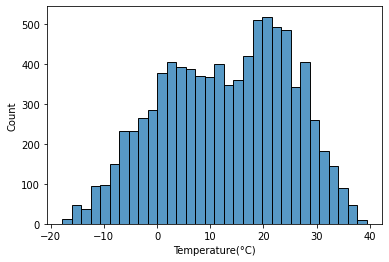

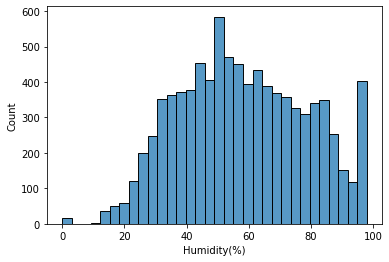

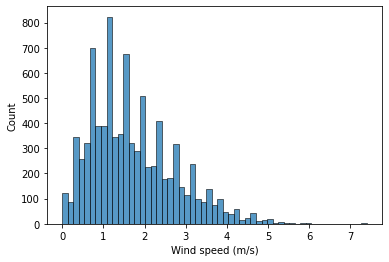

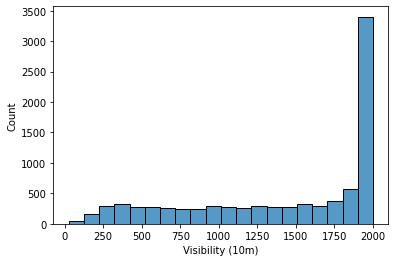

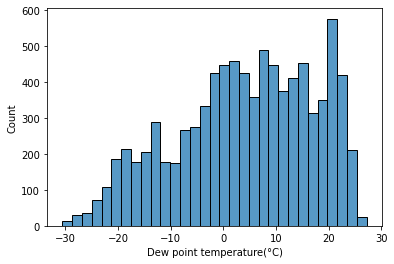

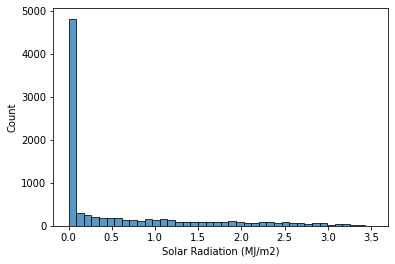

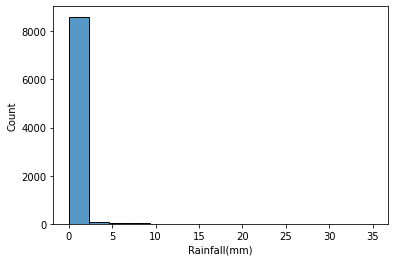

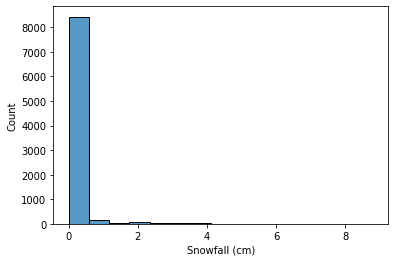

In [76]:
for i in numerical_features:
  sns.histplot(x=data[i])
  plt.show()

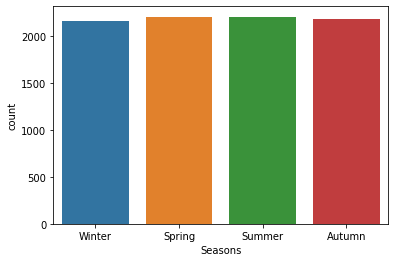

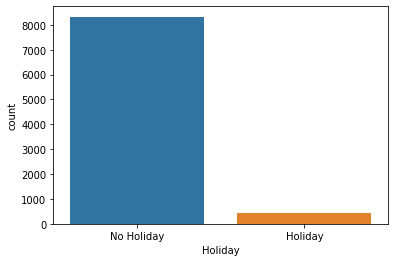

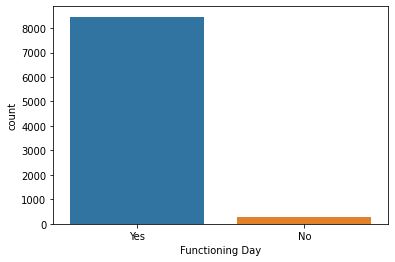

In [55]:
categorical=['Seasons','Holiday', 'Functioning Day']
for i in categorical:
  sns.countplot(data=data, x=i)
  plt.show()

###***Bivariate Analysis***

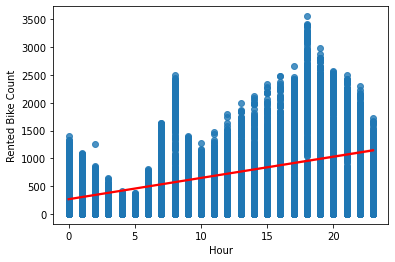

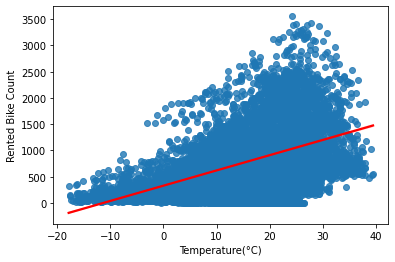

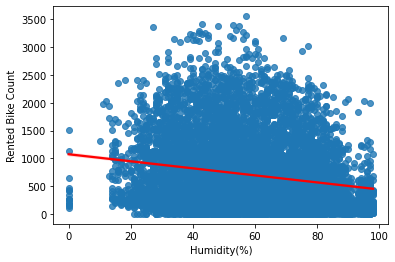

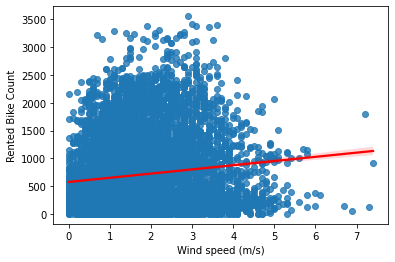

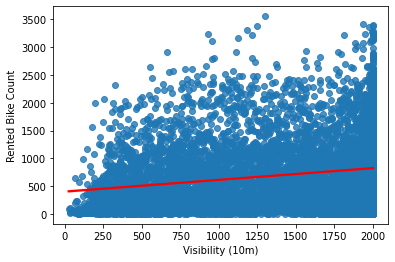

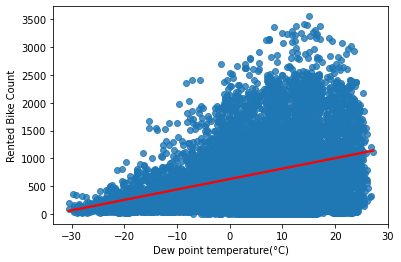

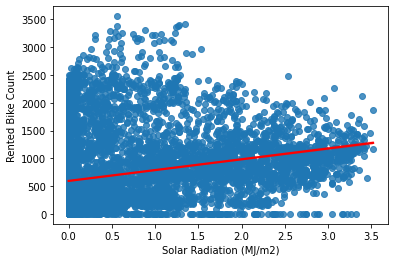

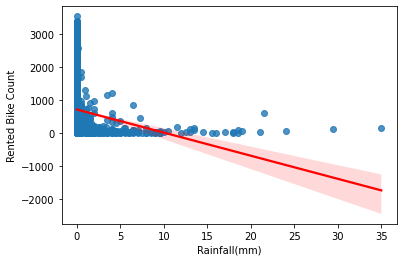

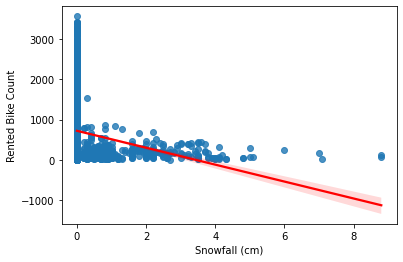

In [56]:
#Understanding relationship of variables with target variable
for i in numerical_features:
  sns.regplot(data, x=i, y='Rented Bike Count',line_kws={"color": "red"})
  plt.show()

In [57]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y", infer_datetime_format='%d%m%Y', exact=True)

Text(0, 0.5, 'Rented Bikes')

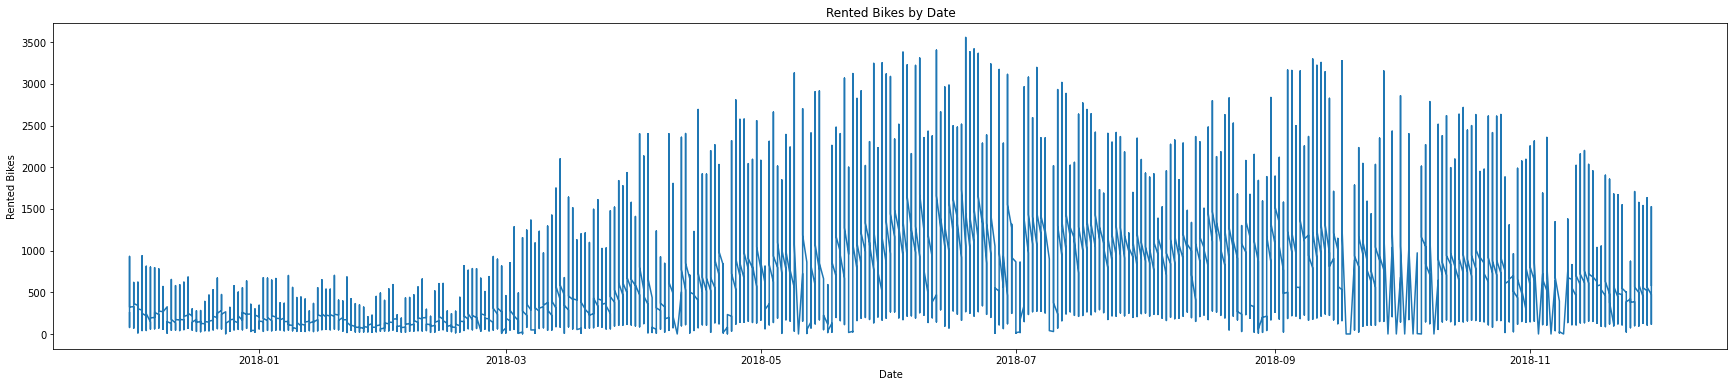

In [58]:
# Plotting the time series of given dataframe
plt.figure(figsize=(30,6))
plt.plot(data['Date'], data['Rented Bike Count'])
 
# Giving title to the chart using plt.title
plt.title('Rented Bikes by Date')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rented Bikes')

In [59]:
holiday_rent = pd.DataFrame(data.groupby('Holiday').agg({'Rented Bike Count':'mean'})).reset_index()
season_rent = pd.DataFrame(data.groupby('Seasons').agg({'Rented Bike Count':'mean'})).reset_index()

Text(0.5, 1.0, 'Holiday vs Mean Rented Bike count')

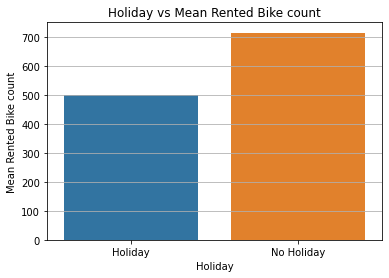

In [60]:
plt.grid()
sns.barplot(holiday_rent, x='Holiday',y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Holiday vs Mean Rented Bike count')


Text(0.5, 1.0, 'Season vs Mean Rented Bike count')

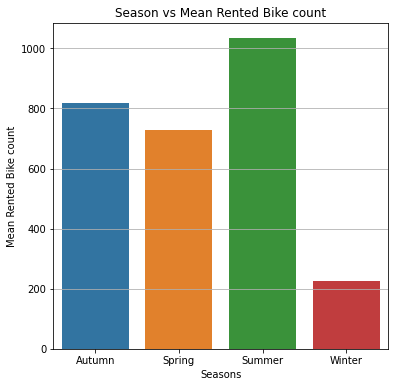

In [61]:
plt.figure(figsize=(6,6))
plt.grid()
sns.barplot(season_rent,  x='Seasons', y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Season vs Mean Rented Bike count')

In [62]:
# split day of week, month and year in three column
data['day_of_week'] = data['Date'].dt.day_name() # extract week name from Date column
data["month"] = data['Date'].dt.month_name()   # extract month name from Date column
data["year"] = data['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [63]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [64]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,2018


In [65]:
daywise_rent = data.groupby(by='day_of_week').agg({'Rented Bike Count':'mean'}).reset_index()


Text(0.5, 1.0, 'Day vs Mean Rented Bike count')

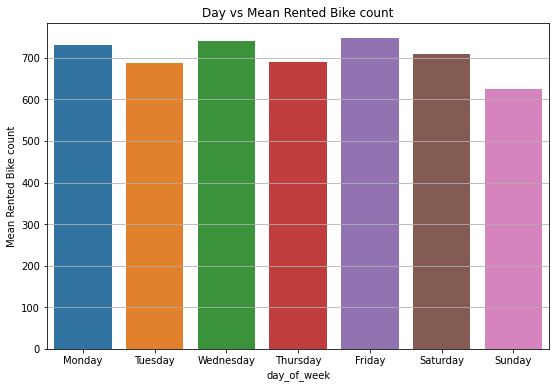

In [66]:
order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(9,6))
plt.grid()
sns.barplot(daywise_rent, x='day_of_week', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Day vs Mean Rented Bike count')

In [67]:
monthwise_rent = data.groupby(by='month').agg({'Rented Bike Count':'sum'}).reset_index()
monthwise_rent

,month,Rented Bike Count
0,April,524227
1,August,651887
2,December,185330
3,February,151833
4,January,150006
5,July,734460
6,June,896887
7,March,380594
8,May,707088
9,November,465715


Text(0.5, 1.0, 'Month vs Mean Rented Bike count')

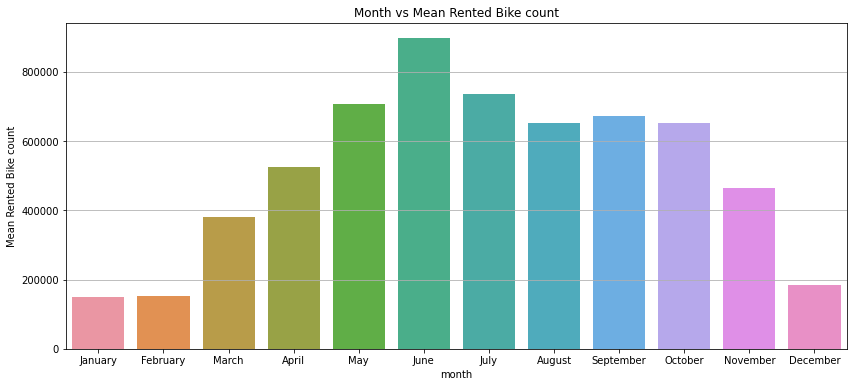

In [68]:
order = ['January','February','March', 'April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
plt.grid()
sns.barplot(monthwise_rent, x='month', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Month vs Mean Rented Bike count')

In [69]:
hourwise_rent = data.groupby(by='Hour').agg({'Rented Bike Count':'mean'}).reset_index()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count')

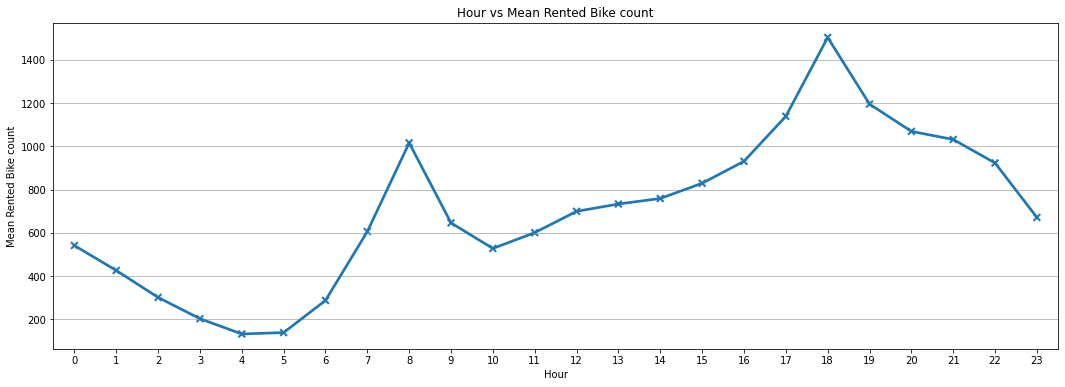

In [70]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(hourwise_rent, x='Hour', y='Rented Bike Count', markers='x')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count')

### ***Multivariate Analysis***

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs days')

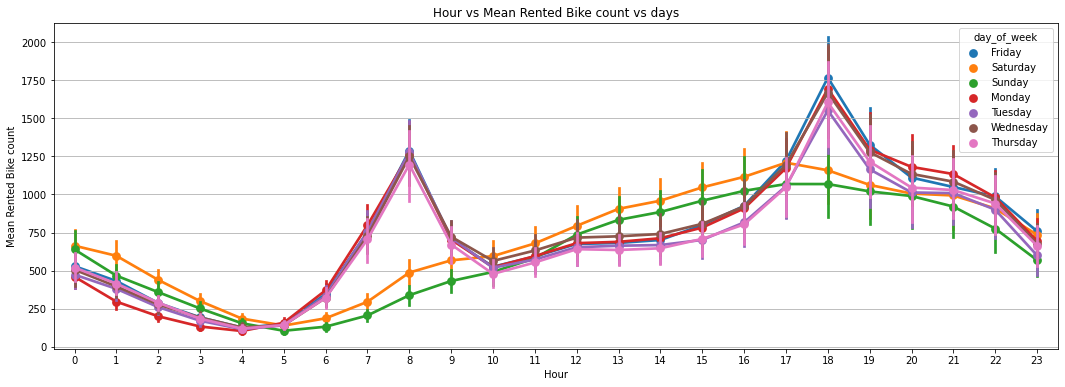

In [71]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='o', hue='day_of_week')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs days')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the futu

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs Seasons')

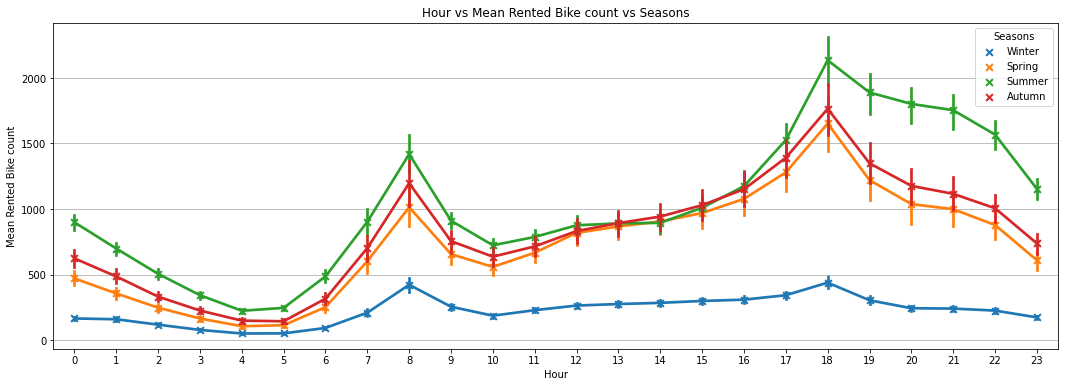

In [72]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='x', hue='Seasons')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs Seasons')

<Axes: >

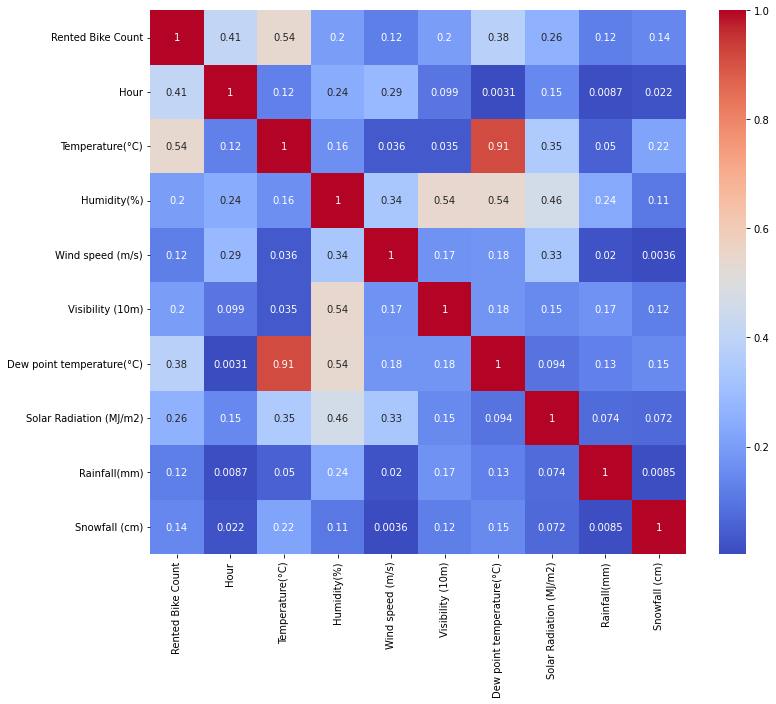

In [37]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().abs(), annot=True,cmap='coolwarm')